## Задача
0. Описать задачу словами
1. Прочитать данные
2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.
3. Обработать пропущенные значения (или убедиться, что их нет)
4. Обработать категориальные признаки
5. Провести нормализацию (или объяснить, почему в вашем случае она не нужна)
6. Разбить данные на обучающую и тестовую выборки
7. Запустить классификатор ближайших соседей (попробовать разное их количество)
8. Вычислить ошибки на обучающей и тестовой выборках. Сделать выводы
9. По желанию: запустить другие классификаторы. Сравнить результаты
10. По желанию: как-то побороться с несбалансированностью классов (если она есть)
11. По желанию: исключить коррелированные переменные (объяснить зачем)
12. Сделать общие выводы

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

## 0. Описание задачи
Задача представляет собой определение наличие дождя завтра по данным полученным за предыдущий период.
Всего на вход подается 9 признаков о состоянии погоды за прошедшие 10 лет (наблюдения проводились ежедневно)

- Location - Имя города
- MinTemp - Минимальная температура за день
- MaxTemp - Максимальная температура за день
- Rainfall - Осадки за день (ММ)
- Evaporation - Испарение за день (ММ)
- Sunshine - Часы яркого солнечного света
- WindGusDir - Направления сильнейшего ветра за день (по компасу, 16 направлений)
- WindGuSpeed - Скорость сильнейшего ветра за день (КМ/ч)
- WindDir9am - Направление ветра за 10 минут до 9и утра
- WindDir3pm - Направление ветра за 10 минут до 3ех дня
- WindSpeed9am - Скорость ветра за 10 минут до 9и утра
- WindSpeed3pm - Скорость ветра за 10 минут до 3ех утра
- Humidity9am - Влажность воздуха в 9 утра (процент)
- Humidity3pm - Влажность воздуха в 3 дня (процент)
- Pressure9am - Атмосферное давление в 9 утра (гПа)
- Pressure3pm - Атмосферное давление в 3 дня (гПа)
- Cloud9am - Перекрытие неба облаками в 9 утра
- Cloud3pm - Перекрытие неба облаками в 3 дня
- Temp9am - Температура воздуха в 9 утра
- Temp3pm - Температура воздуха в 3 дня
- RainToday - Есть ли дождь в этот день (1/0)
- RainTomorrow - Есть ли дождь завтра (1/0)

## 1. Загрузка данных

In [8]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## 2. Визуализация и основные статистические хар-ки

In [9]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


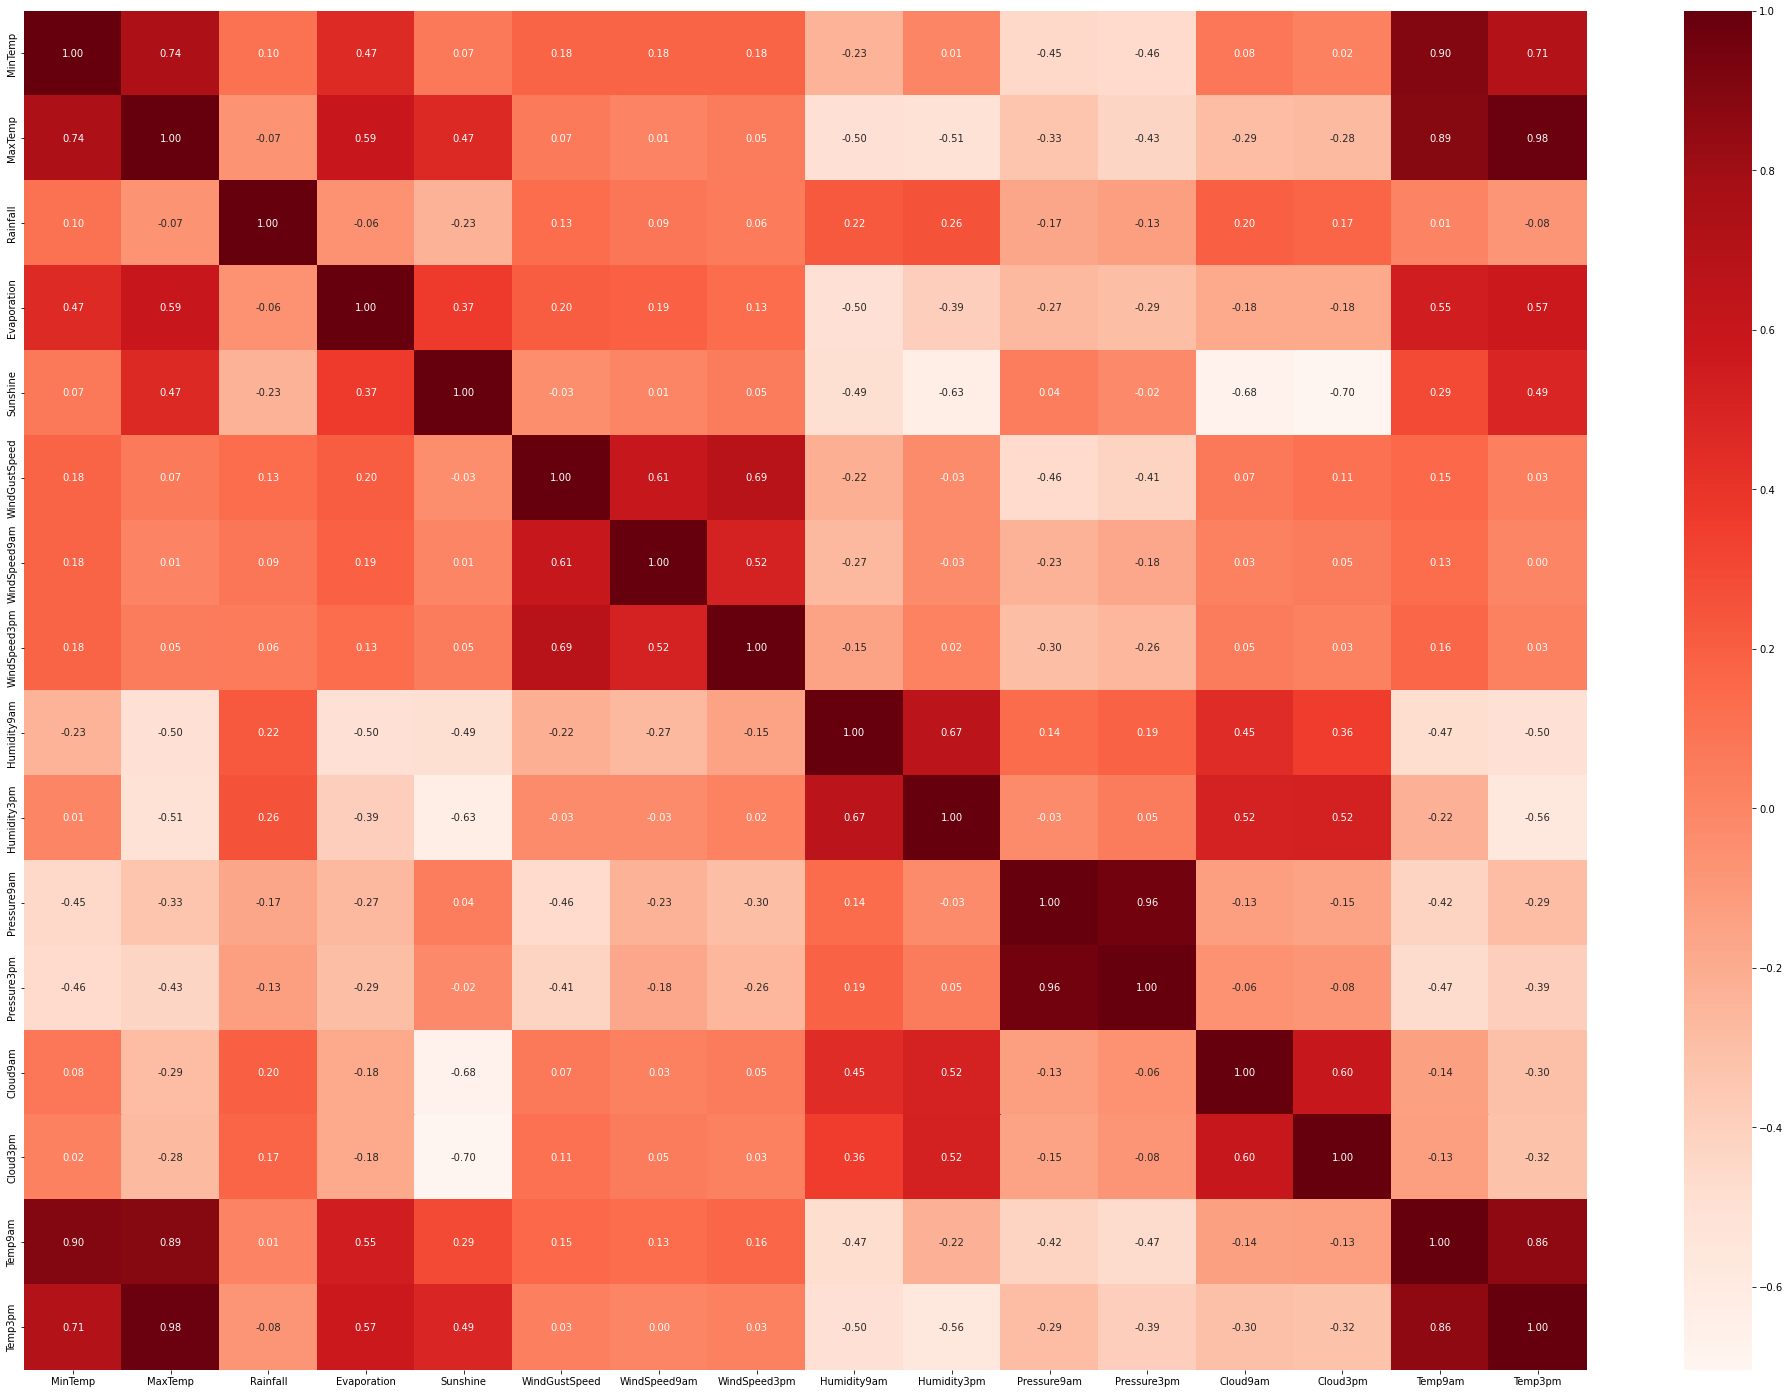

In [10]:
fig = plt.figure(figsize=(35,25))
fig.patch.set_facecolor('white')
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds,fmt='.2f')

## 3. Обработка пропущенных значений

In [11]:
categorical = df.select_dtypes(include = "object").columns
cleaner = ColumnTransformer([
    ('categorical_transformer', SimpleImputer(strategy='most_frequent'), categorical)
])
df[categorical] = cleaner.fit_transform(df[categorical])

In [13]:
df = df.fillna(df.median())
df.isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

## 4. Обработка категориальных значений

In [14]:
objects = df.select_dtypes(include = "object").columns
for i in range(len(objects)):
    df[objects[i]] = LabelEncoder().fit_transform(df[objects[i]])
df.dtypes

Date               int64
Location           int64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int64
WindGustSpeed    float64
WindDir9am         int64
WindDir3pm         int64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
dtype: object

## 5. Нормализация данных

In [15]:
to_normalize = df.drop(df[objects], axis=1)
normalized_df=(to_normalize-to_normalize.mean())/to_normalize.std()
#normalized_df=(to_normalize-to_normalize.min())/(to_normalize.max()-to_normalize.min())
df = pd.concat([normalized_df, df[objects]], axis=1)

## 6. Разбиение выборки на обучающую и тестирующую


Поскольку мы имеем дело с задачей, в которой подразумевается работа с временными рядами, необходимо аккуртано провести разбиение на тренеровочную и тестовую выборки, данные в тестовой выборке должны лежать позднее тренеровочных данных на временном отрезке.

In [24]:
df = df.sort_values(by = 'Date')
X = df.drop(['RainTomorrow'], axis = 1)
y = df['RainTomorrow']
K = int(len(X) * 0.75)
X_train = X.iloc[:K]
X_test = X.iloc[K:]
y_train = y[:K]
y_test = y[K:]

## 7, 8, 9. Обучение и тестирование различных классификаторов

In [27]:
LogRegression = LogisticRegression(max_iter=1780, random_state=42, )
LogRegression.fit(X_train, y_train)
print('LogisticRegression Train Score is : ' , LogRegression.score(X_train, y_train))
print('LogisticRegression Test Score is : ' , LogRegression.score(X_test, y_test))

LogisticRegression Train Score is :  0.8447224895733076
LogisticRegression Test Score is :  0.8400934964938814


In [28]:
KNNClassifier = KNeighborsClassifier(n_neighbors= 7,weights ='uniform',algorithm='auto')
KNNClassifier.fit(X_train, y_train)

print('KNNClassifier Train Score is : ' , KNNClassifier.score(X_train, y_train))
print('KNNClassifier Test Score is : ' , KNNClassifier.score(X_test, y_test))

KNNClassifier Train Score is :  0.8405976442550072
KNNClassifier Test Score is :  0.7782483156881617


In [29]:
gradient_boosting = GradientBoostingClassifier(n_estimators=350, max_depth=7, learning_rate=0.095, random_state=42)
gradient_boosting.fit(X_train, y_train)
print('LogisticRegression Train Score is : ' , gradient_boosting.score(X_train, y_train))
print('LogisticRegression Test Score is : ' , gradient_boosting.score(X_test, y_test))

LogisticRegression Train Score is :  0.9236720289655804
LogisticRegression Test Score is :  0.8304963563866355


In [30]:
sv_classifier = SVC(kernel = 'poly', C = 0.1)
sv_classifier.fit(X_train, y_train)
print('sv_classifier Train Score is : ' , sv_classifier.score(X_train, y_train))
print('sv_classifier Test Score is : ' , sv_classifier.score(X_test, y_test))

sv_classifier Train Score is :  0.7801274118887208
sv_classifier Test Score is :  0.7830331362573903


# Выводы

В целом, задача неплохо поддается классификации, в среднем все модели отработали нормально при этом градиентный бустинг и лог. регрессия показали схожий результат, что неожиданно, поскольку ожидается что GB имеет большую обобщающую способность при правильно подобранных параметрах. Вероятно, необходим дополнительный тюнинг моделей